In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from Data_scrapping import get_market_data_by_option_for_computing_implied_volatility, get_SOFR_curve
from Computing_IV import get_Implied_volatility
from Graphs import lines_3D

In [ ]:
tickers_set = ['^SPX','AAPL','MSFT','NVDA','AVGO','ORCL', 'CSCO', 'CRM','TXN','ADBE','QCOM','INTC','IBM','AMZN','TSLA', 'HD','MCD','NKE','LOW', 'GOOG', 'META','TMUS','DIS','NFLX','VZ', 'CMCSA','T', 'XOM', 'CVX', 'COP', 'BRK-B', 'V', 'JPM', 'MA', 'BAC','WFC','SCHW','MS','UNH', 'JNJ', 'PFE', 'ABBV', 'MRK', 'TMO', 'ABT', 'BMY', 'CVS', 'WMT', 'PG', 'KO', 'PEP', 'COST', 'PM', 'UPS', 'RTX', 'HON', 'NEE']

get_market_data_by_option_for_computing_implied_volatility(tickers_set)

In [2]:
#data loading (retrieved at market data)
ticker = 'AAPL'
data_date = "2023-04-21_22-6"
filename = "DATA-" + data_date + "\\" + ticker + ".csv"
options_data = pd.read_csv(filename)
SOFR_curve = get_SOFR_curve(4.80)
expiry_date = '2023-10-20'
expiry_date_list = [expiry_date]

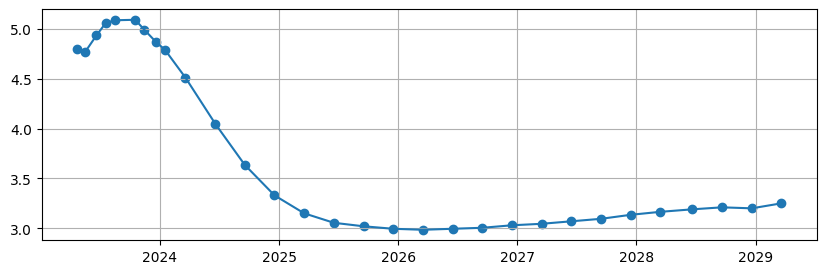

In [3]:
plt.figure(figsize = (10, 3))
plt.plot(SOFR_curve['date settlement'], SOFR_curve['close'])
plt.scatter(SOFR_curve['date settlement'], SOFR_curve['close'])
plt.grid()
plt.show()

In [4]:
expiry_date_list=options_data["expiryDate"].unique()
print(expiry_date_list)

['2023-04-21' '2023-04-28' '2023-05-05' '2023-05-12' '2023-05-19'
 '2023-05-26' '2023-06-02' '2023-06-16' '2023-07-21' '2023-08-18'
 '2023-09-15' '2023-10-20' '2023-11-17' '2023-12-15' '2024-01-19'
 '2024-03-15' '2024-06-21' '2024-09-20' '2024-12-20' '2025-01-17'
 '2025-06-20' '2025-12-19']


In [5]:
for expiry_date in expiry_date_list:
    options_at_given_expiry = options_data.loc[options_data["expiryDate"]==expiry_date]
    print("Number of different contracts traded on",data_date, "for contracts expiring on", expiry_date, ":", len(options_at_given_expiry))

Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-04-21 : 64
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-04-28 : 75
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-05-05 : 84
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-05-12 : 81
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-05-19 : 68
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-05-26 : 43
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-06-02 : 31
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-06-16 : 69
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-07-21 : 82
Number of different contracts traded on 2023-04-21_22-6 for contracts expiring on 2023-08-18 : 78
Number of different 

In [6]:
Implied_Volatility = get_Implied_volatility(options_data, SOFR_curve)

C:\Users\Samunr1s\Desktop\Vega institut\Vega_presentation\result\Computing_IV.py:136: RuntimeWarning: invalid value encountered in sqrt
  stddev = sigma*np.sqrt(T)
C:\Users\Samunr1s\Desktop\Vega institut\Vega_presentation\result\Computing_IV.py:140: RuntimeWarning: invalid value encountered in sqrt
  vega = F * norm.pdf(d1) * np.sqrt(T)
C:\Users\Samunr1s\Desktop\Vega institut\Vega_presentation\result\Computing_IV.py:136: RuntimeWarning: invalid value encountered in sqrt
  stddev = sigma*np.sqrt(T)
C:\Users\Samunr1s\Desktop\Vega institut\Vega_presentation\result\Computing_IV.py:140: RuntimeWarning: invalid value encountered in sqrt
  vega = F * norm.pdf(d1) * np.sqrt(T)
C:\Users\Samunr1s\Desktop\Vega institut\Vega_presentation\result\Computing_IV.py:136: RuntimeWarning: invalid value encountered in sqrt
  stddev = sigma*np.sqrt(T)
C:\Users\Samunr1s\Desktop\Vega institut\Vega_presentation\result\Computing_IV.py:140: RuntimeWarning: invalid value encountered in sqrt
  vega = F * norm.pdf(

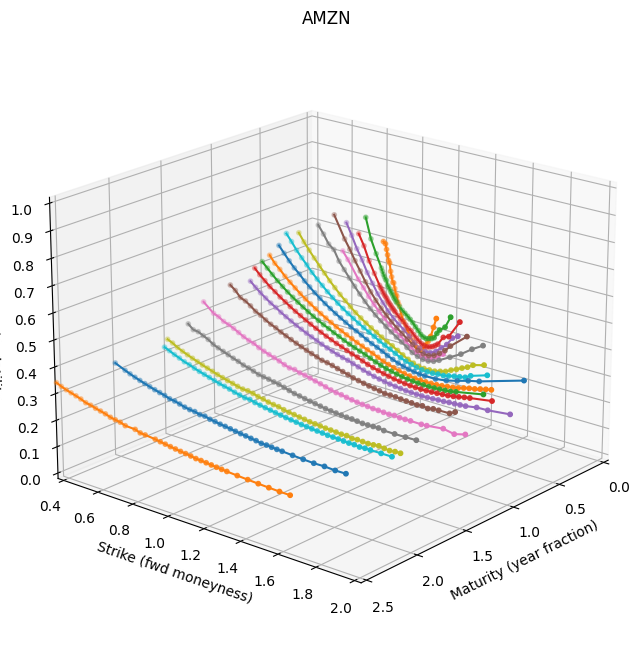

In [7]:
lines_3D('AMZN', Implied_Volatility)

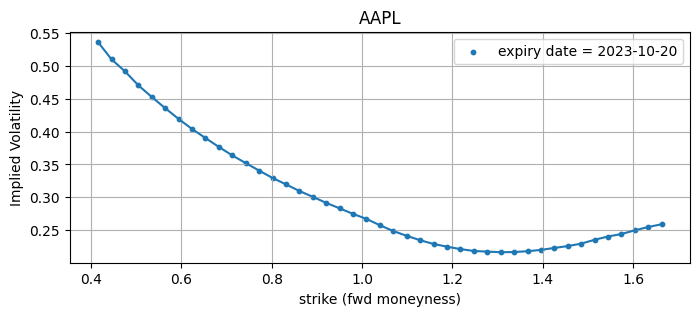

In [8]:
plt.figure(figsize = (8,3))
ax = plt.gca()

k = Implied_Volatility["implied_volatility_surface"][11]
ax.scatter(np.array(k['strikes'])/k['reference_forward'], k['mid_implied_volatilities'], label= ('expiry date = ' + k['expiry_date']), s=10)
plt.plot(np.array(k['strikes'])/k['reference_forward'],k['mid_implied_volatilities'])
# plt.plot(np.array(k['strikes'])/k['reference_forward'],k['ask_implied_volatilities'])
# plt.plot(np.array(k['strikes'])/k['reference_forward'],k['bid_implied_volatilities'])

ax.set_title(ticker)
ax.set_xlabel(r'strike (fwd moneyness)')
ax.set_ylabel(r'Implied Volatility')
ax.legend()
ax.grid()
plt.show()